In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import calendar
from datetime import datetime
from math import sin,cos,sqrt,atan2,radians,asin
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from geopy.distance import geodesic


In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')


In [3]:
train = pd.read_csv(r'D:\Data Python\NewYork\train.csv',nrows=6000000)


In [4]:
print(train.head())

                             key  fare_amount          pickup_datetime  \
0  2009-06-15 17:26:21.0000001    4.5          2009-06-15 17:26:21 UTC   
1  2010-01-05 16:52:16.0000002    16.9         2010-01-05 16:52:16 UTC   
2  2011-08-18 00:35:00.00000049   5.7          2011-08-18 00:35:00 UTC   
3  2012-04-21 04:30:42.0000001    7.7          2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135  5.3          2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0 -73.844311         40.721319       -73.841610          40.712278          
1 -74.016048         40.711303       -73.979268          40.782004          
2 -73.982738         40.761270       -73.991242          40.750562          
3 -73.987130         40.733143       -73.991567          40.758092          
4 -73.968095         40.768008       -73.956655          40.783762          

   passenger_count  
0  1                
1  1                
2  2                
3  1    

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 366.2+ MB
None


In [10]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [16]:
train['date']= train['pickup_datetime'].dt.date
train['day']=train['pickup_datetime'].apply(lambda x:x.day)
train['hour']=train['pickup_datetime'].apply(lambda x:x.hour)
train['weekday']=train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train['month']=train['pickup_datetime'].apply(lambda x:x.month)
train['year']=train['pickup_datetime'].apply(lambda x:x.year)

In [17]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,date,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,2009-06-15,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,2010-01-05,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,2011-08-18,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,2012-04-21,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,2010-03-09,9,7,Tuesday,3,2010


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 20 columns):
key                   object
fare_amount           float64
pickup_datetime       datetime64[ns]
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count       int64
pickup_date           object
pickup_day            int64
pickup_hour           int64
pickup_day_of_week    object
pickup_month          int64
pickup_year           int64
date                  object
day                   int64
hour                  int64
weekday               object
month                 int64
year                  int64
dtypes: datetime64[ns](1), float64(5), int64(9), object(5)
memory usage: 915.5+ MB


In [19]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year,day,hour,month,year
count,6.000000e+06,6.000000e+06,6.000000e+06,5.999961e+06,5.999961e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,1.134049e+01,-7.251142e+01,3.992406e+01,-7.251060e+01,3.992049e+01,1.684645e+00,1.572114e+01,1.351107e+01,6.266082e+00,2.011739e+03,1.572114e+01,1.351107e+01,6.266082e+00,2.011739e+03
std,9.810989e+00,1.280236e+01,9.022813e+00,1.285400e+01,9.367604e+00,1.327794e+00,8.685449e+00,6.515554e+00,3.435069e+00,1.860236e+00,8.685449e+00,6.515554e+00,3.435069e+00,1.860236e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00,8.000000e+00,9.000000e+00,3.000000e+00,2.010000e+03,8.000000e+00,9.000000e+00,3.000000e+00,2.010000e+03
50%,8.500000e+00,-7.398182e+01,4.075263e+01,-7.398016e+01,4.075316e+01,1.000000e+00,1.600000e+01,1.400000e+01,6.000000e+00,2.012000e+03,1.600000e+01,1.400000e+01,6.000000e+00,2.012000e+03
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00,2.300000e+01,1.900000e+01,9.000000e+00,2.013000e+03,2.300000e+01,1.900000e+01,9.000000e+00,2.013000e+03
max,1.273310e+03,3.439426e+03,3.344459e+03,3.457622e+03,3.345917e+03,2.080000e+02,3.100000e+01,2.300000e+01,1.200000e+01,2.015000e+03,3.100000e+01,2.300000e+01,1.200000e+01,2.015000e+03


In [25]:
train.isna().sum()

key                   0 
fare_amount           0 
pickup_datetime       0 
pickup_longitude      0 
pickup_latitude       0 
dropoff_longitude     39
dropoff_latitude      39
passenger_count       0 
pickup_date           0 
pickup_day            0 
pickup_hour           0 
pickup_day_of_week    0 
pickup_month          0 
pickup_year           0 
date                  0 
day                   0 
hour                  0 
weekday               0 
month                 0 
year                  0 
dtype: int64

In [44]:
train['fare_amount'].max() - train['fare_amount'].min()

1373.31

In [45]:
train['fare_amount'].max()

1273.31

In [46]:
train['fare_amount'].min()

-100.0

In [47]:
train['fare_amount'].mean()

11.340491384999993

In [58]:
train = train.loc[train['fare_amount']>=0]

In [65]:
train['fare_amount'].values

array([ 4.5 , 16.9 ,  5.7 , ..., 26.27, 12.9 ,  6.5 ])

In [71]:
train['fare_amount'] = (train['fare_amount'] - np.mean(train['fare_amount'],axis=0))/ np.std(train['fare_amount'],axis=0)

In [77]:
train['fare_amount'].dropna(inplace=True)

In [80]:
train['fare_amount'] = train['fare_amount'].mask(np.isinf(train['fare_amount']))

In [93]:
np.nan_to_num(train['fare_amount'])

array([-0.69739066, -0.5750657 , -0.37119077, ..., -0.34060953,
       -0.65661567, -0.49351573])

In [94]:
train.shape

(4184506, 20)

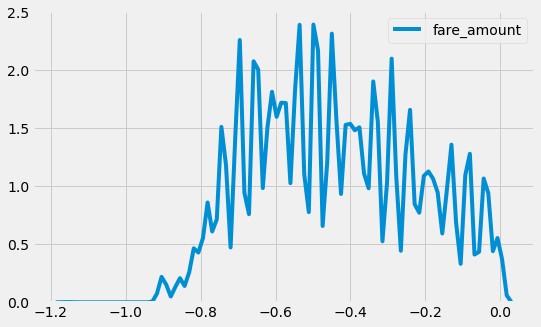

In [95]:
plt.figure(figsize=(8,5))
sns.kdeplot((train['fare_amount']))

In [96]:
print("Range of Pickup Latitude is ", (min(train['pickup_latitude']),max(train['pickup_latitude'])))

Range of Pickup Latitude is  (-3488.079513, 3344.459268)


In [97]:
print("Range of Dropoff Latitude is ", (min(train['dropoff_latitude']),max(train['dropoff_longitude'])))

Range of Dropoff Latitude is  (-3488.079513, 3457.62235)


In [98]:
test =  pd.read_csv(r'D:\Data Python\NewYork\test.csv')
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [101]:
print('Min latitude ',test['pickup_latitude'].min()),
print('Max latitude ',test['pickup_latitude'].max())
print('Min longitude ',test['pickup_longitude'].min()),
print('Max longitude ',test['pickup_longitude'].max())

Min latitude  40.573143
Max latitude  41.709555
Min longitude  -74.252193
Max longitude  -72.986532
